<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Problem**

The purpose of this project is to analyze a healthcare dataset related to diabetes and apply data mining techniques to extract meaningful insights. The main problem addressed is predicting whether a patient is diabetic or non-diabetic based on clinical measurements such as age, glucose level, BMI, insulin, and other health indicators.

This problem is important because diabetes is one of the most widespread chronic diseases worldwide. Early detection can help reduce complications, improve patients’ quality of life, and support preventive healthcare decision-making. By applying machine learning classification and clustering techniques, this project aims to identify patients at high risk and uncover hidden patterns that contribute to diabetes.


#**2. Data Mining Task**
This project involves two types of data mining tasks:

1. Classification
Predicting the diabetes status of a patient (Outcome = 0 or 1) using labeled medical data.
Goal: build a model that can classify patients as diabetic vs. non-diabetic.

2. Clustering
Grouping patients based on similarities in their medical attributes without using the class label.
Goal: discover natural health profiles, potential risk groups, and hidden patterns.


# **3. Data**

The dataset used in this project is the **Healthcare Diabetes Dataset**, obtained from Kaggle. It contains medical information about patients, with the goal of predicting whether an individual has diabetes based on several health-related attributes.

### **Dataset Source**

The dataset was downloaded from Kaggle under the title *Healthcare Diabetes Dataset*.

### **Dataset Description**

The dataset consists of **2768 records** (patients) and **10 attributes**. Each record includes medical measurements commonly associated with diabetes diagnosis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step A: Load dataset
file_path = '/content/Diabetes_dataset.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully.\n")


Dataset loaded successfully.



In [ ]:
print("Step B: Dataset Overview")
print("\nAttributes and Data Types:")
print(df.dtypes)


Step B: Dataset Overview

Attributes and Data Types:
Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                        int64
Age_Bin                     category
Glucose_Bin                 category
dtype: object


In [ ]:
num_attributes = len(df.columns)
print("Number of attributes:", num_attributes)

Number of attributes: 11


In [ ]:
num_records = len(df)
print("Number of records:", num_records)

Number of records: 2768


In [ ]:
print("\nCount of instances for each label (Outcome):")
print(df['Outcome'].value_counts())


Count of instances for each label (Outcome):
Outcome
0    1816
1     952
Name: count, dtype: int64


In [ ]:
print("\nSample of the dataset:")
print(df.head())


Sample of the dataset:
   Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.271845    0.525  0.246795   
1     0.058824  0.264516       0.428571       0.213592    0.525  0.134615   
2     0.470588  0.896774       0.408163       0.213592    0.525  0.081731   
3     0.058824  0.290323       0.428571       0.155340    0.000  0.158654   
4     0.000000  0.600000       0.163265       0.271845    1.000  0.399038   

   DiabetesPedigreeFunction       Age  Outcome Age_Bin Glucose_Bin  
0                  0.491935  0.483333        1   40-49    Diabetes  
1                  0.244624  0.166667        0   30-39      Normal  
2                  0.532258  0.183333        1   30-39    Diabetes  
3                  0.079749  0.000000        0   20-29      Normal  
4                  1.000000  0.200000        1   30-39    Diabetes  


In [ ]:
# Missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:

# Summarize missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)



Missing Values Summary:
                          Missing Count  Missing Percent
Age_Bin                               4         0.144509
Glucose                               0         0.000000
Pregnancies                           0         0.000000
BloodPressure                         0         0.000000
SkinThickness                         0         0.000000
BMI                                   0         0.000000
Insulin                               0         0.000000
DiabetesPedigreeFunction              0         0.000000
Age                                   0         0.000000
Outcome                               0         0.000000
Glucose_Bin                           0         0.000000


In [ ]:
#Numeric attributes
numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
#Five Number Summary
print("Five Number Summary:")
five_num_summary = df[numeric_cols].describe().loc[['min','25%','50%','75%','max']]
print(five_num_summary)

Five Number Summary:
     Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
min     0.000000  0.000000       0.000000       0.000000    0.000  0.000000   
25%     0.058824  0.354839       0.408163       0.174757    0.375  0.150240   
50%     0.176471  0.477419       0.489796       0.213592    0.525  0.227564   
75%     0.352941  0.625806       0.571429       0.242718    0.625  0.295272   
max     1.000000  1.000000       1.000000       1.000000    1.000  1.000000   

     DiabetesPedigreeFunction       Age  
min                  0.000000  0.000000  
25%                  0.148746  0.050000  
50%                  0.266129  0.133333  
75%                  0.489247  0.316667  
max                  1.000000  1.000000  


In [ ]:
#Statistical summary
print("Statistical Summary:")
statistical_summary = df[numeric_cols].describe()
print(statistical_summary)

In [ ]:

# Discretization (Binning)
# Discretize Age into categories
df['Age_Bin'] = pd.cut(df['Age'],
                       bins=[20, 30, 40, 50, 60, 80],
                       labels=["20-29","30-39","40-49","50-59","60+"])

# Discretize Glucose into categories
df['Glucose_Bin'] = pd.cut(df['Glucose'],
                           bins=[0, 99, 125, 200],
                           labels=["Normal","Prediabetes","Diabetes"])

# Show first rows with new bins
df[['Age', 'Age_Bin', 'Glucose', 'Glucose_Bin']].head()

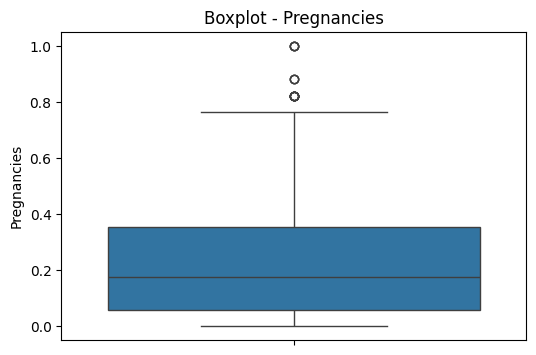

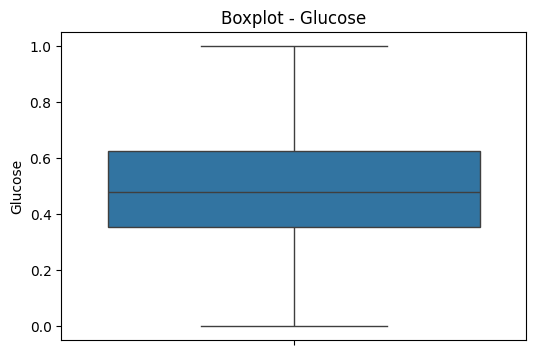

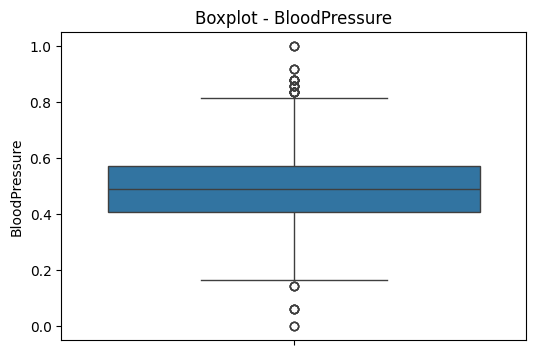

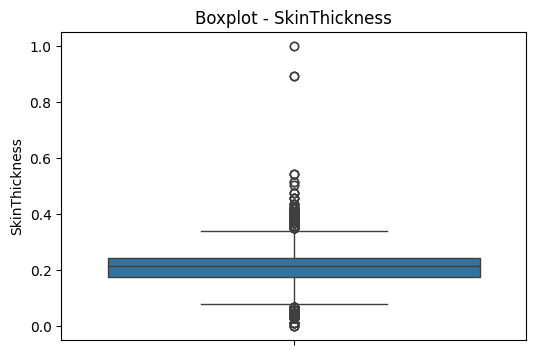

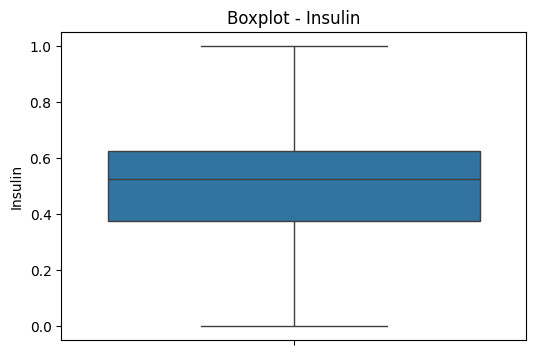

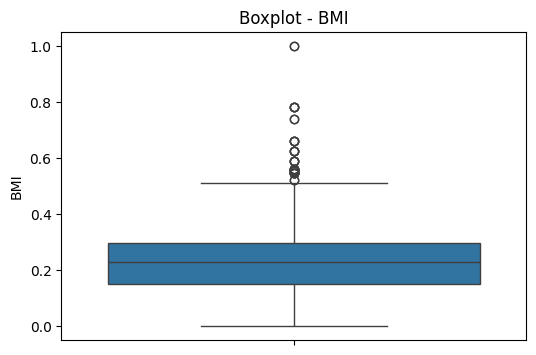

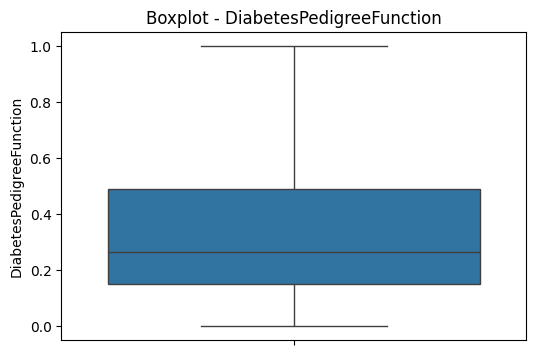

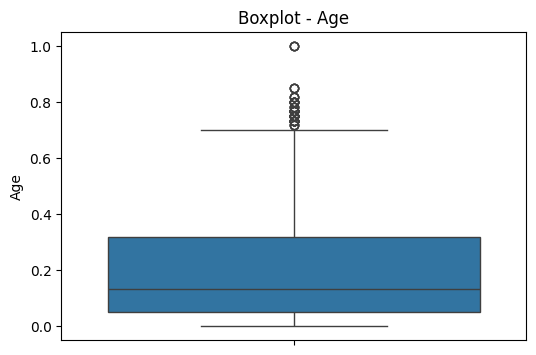

In [ ]:

# Step G: EDA Visualizations
# 1. Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

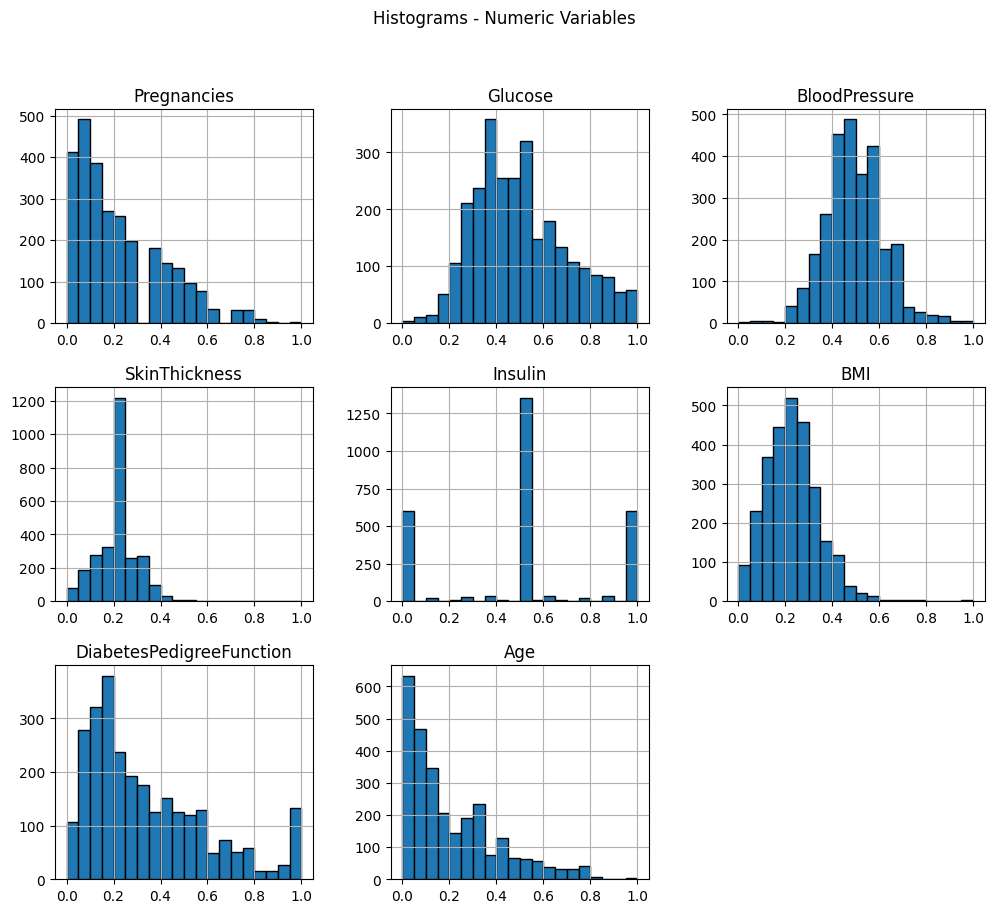

In [ ]:

# 2. Histograms
df[numeric_cols].hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Histograms - Numeric Variables")
plt.show()

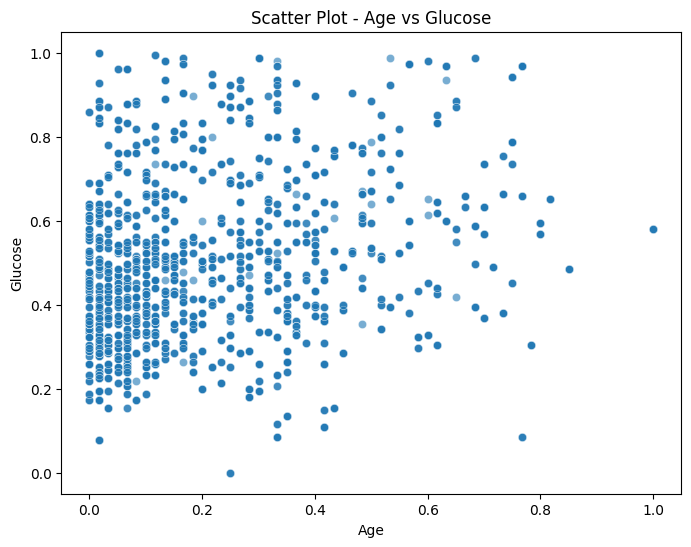

In [ ]:

# 3. Scatter plot: Age vs Glucose
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', data=df, alpha=0.6)
plt.title('Scatter Plot - Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

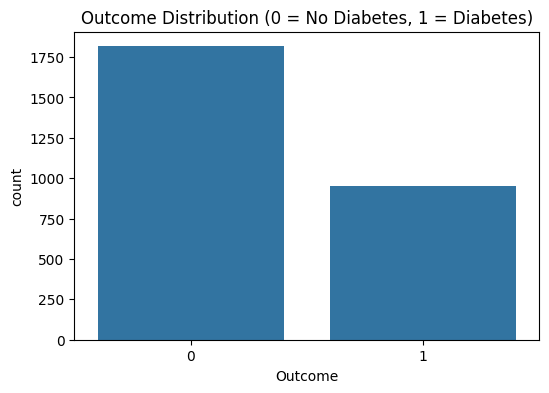

In [ ]:
# 4. Bar plot: Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.show()

Concluding Observations from the Plots and Data Exploration:

Outliers are present in Glucose, Insulin, and BMI, which could affect model performance if not treated.

The Outcome variable is imbalanced, with more non-diabetic (0) cases than diabetic (1) cases.

Scatter plots like Age vs Glucose show variability but no clear linear trend; further analysis may reveal important relationships.

Numeric variables such as BloodPressure and DiabetesPedigreeFunction have wide ranges, indicating the need for normalization.

Handling missing values, treating outliers, discretizing key features, and normalizing numeric variables are essential preprocessing steps to improve model quality and performance


# **4.Data preprocessing**



---

**Data Preprocessing Overview**

Data preprocessing is a crucial step in machine learning as it ensures that the dataset is clean, consistent, and ready for model training. Raw data may contain issues such as missing values, outliers, categorical variables, and features with different scales, all of which can negatively impact the performance of machine learning models.

In our case, the Healthcare Diabetes dataset has several potential issues that need preprocessing, including:

* Missing values in numerical columns such as Glucose, BloodPressure, BMI, Insulin, and SkinThickness.
* Outliers in numeric features like Insulin, Glucose, BMI, and DiabetesPedigreeFunction that could distort statistical analyses.
* Numerical features with different ranges that need normalization to ensure equal influence on machine learning models.

We addressed these issues using the following techniques:

1. **Handling Missing Values:** Replaced missing or zero values in numeric columns with mean or median to prevent model bias.
2. **Outlier Detection & Capping:** Detected outliers using the IQR method and capped extreme values to reduce their impact.
3. **Discretization:** Converted continuous variables like Age and Glucose into categories to improve interpretability.
4. **Normalization (Min-Max Scaling):** Scaled numeric features to the range [0, 1] to ensure all features contribute equally during modeling.
5. **Noise Reduction:** Applied rolling mean smoothing on Glucose, BloodPressure, and BMI to reduce random fluctuations and clarify patterns.





#snapshot for raw dataset


In [ ]:
#snapshot for raw dataset
df.head()

**Handling Missing Values**

Replaced zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN, then filled missing values using mean or median.This improved data accuracy by removing unrealistic zeros and completing missing records.




In [ ]:
# Columns where zero is invalid
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Check missing values again
df.isnull().sum()

 **Handling Outlier**


Detected and handled outliers in numeric columns using the IQR (Interquartile Range) method. Extreme values in attributes like Insulin and DiabetesPedigreeFunction were capped within acceptable limits. This step reduced the effect of extreme values and made the data distribution more balanced and reliable.

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return np.where(series < lower, lower, np.where(series > upper, upper, series))

df['Insulin'] = cap_outliers(df['Insulin'])
df['DiabetesPedigreeFunction'] = cap_outliers(df['DiabetesPedigreeFunction'])

**Noise Removal**


Used a moving average smoothing method to reduce random fluctuations in numeric features.This step helped remove noise and made data patterns clearer.

In [ ]:
# Noise removal using rolling mean (smoothing)
for col in ['Glucose', 'BloodPressure', 'BMI']:
    df[col] = df[col].rolling(window=3, min_periods=1).mean()

df.head()

**Discretization**


Converted continuous values into categories for better interpretability. Age was grouped into ranges (20–29, 30–39, etc.), and Glucose was classified as Normal, Prediabetes, or Diabetes. This helps algorithms identify patterns more effectively.

In [ ]:
# Discretization (Binning)
# Discretize Age into categories
df['Age_Bin'] = pd.cut(df['Age'],
                       bins=[20, 30, 40, 50, 60, 80],
                       labels=["20-29","30-39","40-49","50-59","60+"])

# Discretize Glucose into categories
df['Glucose_Bin'] = pd.cut(df['Glucose'],
                           bins=[0, 99, 125, 200],
                           labels=["Normal","Prediabetes","Diabetes"])

# Show first rows with new bins
df[['Age', 'Age_Bin', 'Glucose', 'Glucose_Bin']].head()

**Normalization & Snapsot of preorcessed dataset**


Applied MinMaxScaler to scale numeric values between 0 and 1.This ensured that all attributes have equal influence on the models.

In [ ]:
# Drop Id column (not useful)
df = df.drop(columns=['Id'])

# Apply Min-Max Normalization [0,1] only to numeric columns
scaler = MinMaxScaler()

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['Outcome']).columns

**snapsot of preorcessed dataset**

In [ ]:
#snapsot of preorcessed dataset
df.head()

#**Save preprocessed dataset**

In [ ]:
# Save preprocessed dataset
df.to_csv("Preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved as Preprocessed_dataset.csv")




# **5. Data Mining Technique**




# **6.  Evaluation and Comparison**

# For Clustering:



---


Clustering is an unsupervised learning technique used to group similar data points based on similarity.
In this project, K-means clustering was applied using two numerical features (Glucose and BMI) because they are strong health indicators and allow clear 2D visualization.
The goal is to evaluate different K values, compute evaluation metrics, visualize the clusters, and identify the best K.*italicized text*





**Selected Features Snapshot**

In [ ]:
data = pd.read_csv("Preprocessed_dataset.csv")
data[['Glucose', 'BMI']].head()


**Applying K-means with Different K Values**

To determine the optimal number of clusters, K-means was applied using a range of K values.
The following K values were used:
* For WCSS (Elbow Method): K = (2 ،10)
* For Silhouette Score: K = 2, 3, 4, 5, 6
* For Visualization: K = 2, 3, 4


This satisfies the project requirement of evaluating at least three different values of K.

**Elbow Method (Total Within-Cluster Sum of Squares)**

The Elbow Method measures how compact the clusters are by computing the WCSS for several values of K.
A significant drop in WCSS followed by a flattening indicates the “elbow point,” which suggests an appropriate K.

In [ ]:
# ==============================
# Part 1: Load data and select features
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("Preprocessed_dataset.csv")
X = data[['Glucose', 'BMI']].values

# ==============================
# Part 2: Elbow Method (WCSS)
# ==============================

wcss = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_values, wcss, marker='o')
plt.title('Elbow Method (WCSS vs K)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True, alpha=0.3)
plt.show()


**Silhouette Coefficient**

The Silhouette Score evaluates how well-separated and cohesive clusters are.
It ranges from −1 to 1, where:
* Values near 1 = well-defined clusters
* Values near 0 = overlapping clusters
* Negative values =points assigned to the wrong cluster

In [ ]:
# ==============================
# Part 3: Silhouette Coefficient
# ==============================

selected_K = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in selected_K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(6, 4))
plt.plot(selected_K, silhouette_scores, marker='o')
plt.title('Silhouette Score for different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()


**Cluster Visualization**

Cluster visualization is essential for interpreting the model’s performance.
We plotted clusters for K = 2, 3, and 4 using Glucose and BMI.
Each cluster is shown with a unique color, and centroids are displayed in yellow.

In [ ]:
# ==============================
# Part 4: Apply K-Means for K = 2, 3, 4 and plot clusters
# ==============================

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(6, 4))

    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
                s=80, c='red', label='Cluster 1')

    if k > 1:
        plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
                    s=80, c='blue', label='Cluster 2')

    if k > 2:
        plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
                    s=80, c='green', label='Cluster 3')

    if k > 3:
        plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
                    s=80, c='purple', label='Cluster 4')

    # Centroids
    for i in range(k):
        plt.scatter(kmeans.cluster_centers_[i, 0],
                    kmeans.cluster_centers_[i, 1],
                    s=200, c='yellow', edgecolor='black',
                    label='Centroids' if i == 0 else None)

    plt.title(f'K-Means Clustering (K = {k})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()


**Evaluation Summary**

WCSS shows how tight the clusters are, and Silhouette Score shows how meaningful the separation between them is.

| Metric                   | K = 2     | K = 3     | K = 4     |
|--------------------------|-----------|-----------|-----------|
| Silhouette Score         | 0.4202    | 0.3390    | 0.3425    |
| Total WCSS               | 59.0429   | 43.9756   | 36.2182   |


**Selecting the Best K (Majority Rule)**



Based on the evaluation metrics and visual inspection, the optimal number of clusters was chosen using the majority rule.
* The Silhouette Score achieves its highest value at K = 2, indicating better separation and cohesion.
* The WCSS (Elbow Method) shows a reduction in WCSS as K increases, but the most noticeable improvement occurs before K = 3.
* The Visualization of clusters shows clearer and more meaningful cluster boundaries when K = 2 compared to other values.
### Therefore, the best **K = 2**

**Interpretation**

**K = 2**

Produces two distinct clusters that clearly separate individuals with lower Glucose/BMI values from those with higher values. This represents a meaningful division between low-risk and high-risk groups.

**K = 3**

Adds a third intermediate group, but the clusters start to overlap, and the improvement in separation is minimal according to the Silhouette Score.

**K = 4**

Clusters become less meaningful, with noticeable overlap and inconsistent boundaries, indicating over-segmentation of the data.
Overall Interpretation

 **K = 2** provides the **best balance** between compact clusters and clear separation.
It achieves the highest Silhouette Score, maintains reasonable compactness, and produces the most interpretable visual structure.